# Predictions evaluation

**NOTEBOOK GOAL**: Evaluate the predicted NumberOfSales values according to the BIP provided error function.

Evaluation of the predictions from the datasets:

- [XGB1 fake test.csv](#XGB1_fake_test.csv)

In [1]:
from import_man import *
from BIP_error import get_BIP_error

### XGB1_fake_test.csv

In [2]:
XGB1 = pd.read_csv("dataset/XGB1_fake_test.csv")
XGB1.head()

,StoreID,IsHoliday,HasPromotions,NearestCompetitor,Region,NumberOfSales,Region_AreaKM2,Region_GDP,Region_PopulationK,CloudCover,...,t-8,t-6,t-15,t-21,t-13,t-20,MeanStoreSales,MeanRegionSales,D_Day_of_week,_NumberOfSales
0,1000,0,0,326,7,8540.000000,9643,17130,2770,6.0,...,7675.446488,10650.000000,7675.446488,7368.0,10520.0,6858.0,7682.751625,4698.572717,0,8713.4240
1,1000,0,0,326,7,10364.000000,9643,17130,2770,7.0,...,11881.000000,4498.000000,12353.000000,6858.0,9479.0,5890.0,7682.751625,4698.572717,1,7587.1230
2,1000,0,0,326,7,4676.000000,9643,17130,2770,7.0,...,10650.000000,7675.446488,10520.000000,5890.0,10529.0,6913.0,7682.751625,4698.572717,2,5123.7876
3,1000,1,0,326,7,7675.446488,9643,17130,2770,7.0,...,4498.000000,7675.446488,9479.000000,6913.0,9050.0,7282.0,7682.751625,4698.572717,3,7019.3970
4,1000,0,0,326,7,6267.000000,9643,17130,2770,6.0,...,7675.446488,8930.000000,10529.000000,7282.0,9835.0,9179.0,7682.751625,4698.572717,4,6934.7220


In [3]:
error1 = get_BIP_error(XGB1)

Number of regions identified: 11
BIP total error: 0.019723761136724777


### Predictions analysis

In [4]:
pred_diff = XGB1[['StoreID', 'D_Day', 'NumberOfSales', '_NumberOfSales']]
pred_diff.head()

,StoreID,D_Day,NumberOfSales,_NumberOfSales
0,1000,1,8540.000000,8713.4240
1,1000,2,10364.000000,7587.1230
2,1000,3,4676.000000,5123.7876
3,1000,4,7675.446488,7019.3970
4,1000,5,6267.000000,6934.7220


AxesSubplot(0.125,0.125;0.775x0.755)


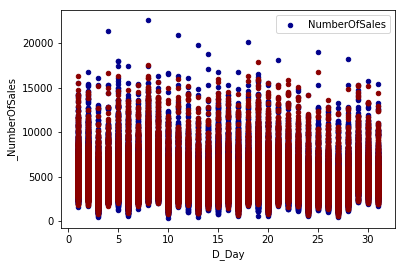

In [5]:
# pred_diff.plot(x='D_Day', y=['NumberOfSales', '_NumberOfSales'], kind='scatter')


ax = pred_diff.plot.scatter(x='D_Day', y='NumberOfSales', color='DarkBlue', label='NumberOfSales');

print(ax)
pred_diff.plot.scatter(x='D_Day', y='_NumberOfSales', color='DarkRed', label='_NumberOfSales', ax=ax);

# FOLLLOWING GRAPH MUST BE IMPROVED